Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)


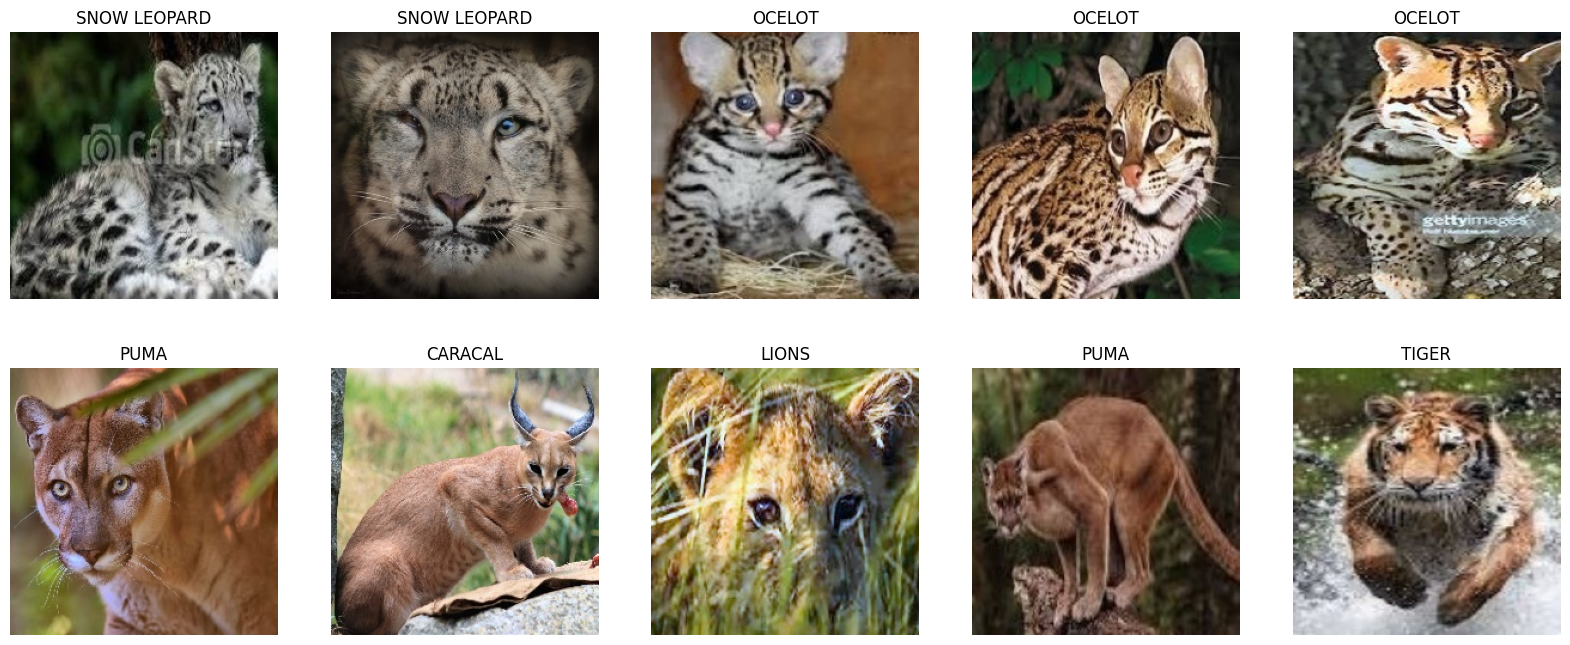

In [2]:
############# Loading the data ###############

from src.utils import *

# loading process of the dataset. This dataset was downloaded from 'https://drive.switch.ch/index.php/s/XSnhQDNar7y46oQ'. 
imgs, labels = load_imgs('./src/Wild_Cats_Dataset', ['CHEETAH' ,
                                                      'OCELOT',
                                                      'SNOW LEOPARD',
                                                      'CARACAL',
                                                      'LIONS',
                                                      'PUMA',
                                                      'TIGER'])

x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))

plot_sample(imgs, labels, 2, 5, resize=(224, 224)) #here 5,5 was changed to 2,5 to reduce a bit the dimension of the plot

Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)
--------------------------------------------------------------------------------------------------------------------------------------------
Final Model: FFNN - Dense 128 - relu - Dense 64 - relu - 15 number of epochs
Test loss: 4.87 - Test accuracy: 0.216
--------------------------------------------------------------------------------------------------------------------------------------------


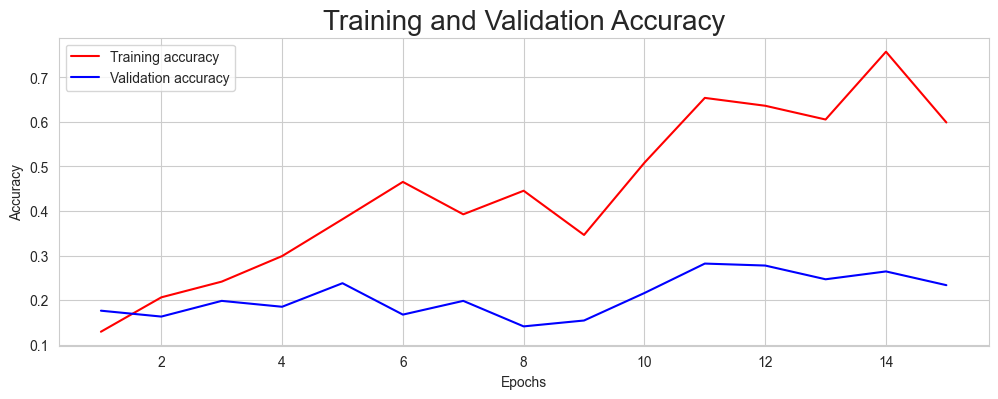

--------------------------------------------------------------------------------------------------------------------------------------------
The estimation of the classification accuracy, 5 cv approach, for this FFNN is 0.2679 +/- 0.04271
--------------------------------------------------------------------------------------------------------------------------------------------


In [4]:
################### Task 1 ###################

# THIS CODE WAS IMPLEMENTED WITH THE FOLLOWING VERSIONS OF Keras,Tensorflow and Scikit-learn:

# Keras: Version: 2.12.0

# Tensorflow: Version: 2.12.0

# Scikit-learn: Version: 1.2.2

from src.utils import *

# loading process of the dataset. This dataset was downloaded from 'https://drive.switch.ch/index.php/s/XSnhQDNar7y46oQ'. 
imgs, labels = load_imgs('./src/Wild_Cats_Dataset', ['CHEETAH' ,
                                                      'OCELOT',
                                                      'SNOW LEOPARD',
                                                      'CARACAL',
                                                      'LIONS',
                                                      'PUMA',
                                                      'TIGER'])

x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
print("-" * 140)

#####################################################################################################################################

# normalizing and reshaping x
x = x/255
x = x.reshape(-1, 224 * 224 * 3)

# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# setting the seed for reproducibility
import keras
import numpy as np
np.random.seed(80)
keras.utils.set_random_seed(80)

# importing warnings
import warnings 
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasClassifier


# setting the number of neurons in the first and in second layer
neurons_first_layer = 128
neurons_second_layer = 64

# creating a Sequential model
ffnn = Sequential()
# adding the first Dense layer with ReLU activation
ffnn.add(Dense(neurons_first_layer, activation='relu', input_shape=(150528,))) # 150528 = 224*224*3
# adding the second Dense layer with ReLU activation
ffnn.add(Dense(neurons_second_layer, activation='relu'))
# how many different classes?
n_classes = 7
# adding the output layer
ffnn.add(Dense(n_classes, activation='softmax'))

# compiling the model with the adam optimizer
ffnn.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

# setting the number of epochs
epochs= 15

# setting the validation set size
validation_size = 0.20 # 20% of the training data

# fitting the ffnn with a validation_split and with its history
history = ffnn.fit(X_train, y_train, 
                  epochs=epochs, 
                  batch_size=32, 
                  validation_split=validation_size,
                  verbose=0)

# saving the model
save_keras_model(ffnn,'T1_ffnn.h5')

# loading back the model
ffnn = load_model('T1_ffnn.h5')

print(f"Final Model: FFNN - Dense {neurons_first_layer} - relu - Dense {neurons_second_layer} - relu - {epochs} number of epochs")

# evaluating the model
scores = ffnn.evaluate(X_test,y_test,verbose=0)

print("Test loss: {:.4} - Test accuracy: {:.4}".format(*scores))

# retrieving a list of accuracy results on training and validation data for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("-" * 140)

# setting the style for the plot
sn.set_style("whitegrid")

# epochs range
epochs_range = range(1,epochs+1)

# plotting training and validation accuracy per epoch
plt.figure(figsize=(12,4))
plt.plot(epochs_range, acc, 'r', label='Training accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy',size=20)
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Kfold approach to calculate an estimation of the classification accuracy we expect on new and unseen images

def create_model():
      # creating the model
      model = Sequential()
      # adding the first layer - input layer
      model.add(Dense(neurons_first_layer, activation='relu', input_shape=(150528,))) # 150528 = 224*224*3
      # adding the second layer
      model.add(Dense(neurons_second_layer, activation='relu'))
      # adding the output layer
      model.add(Dense(n_classes, activation='softmax'))
      # compiling the model
      model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
      return model

# wrapping the model using the create_model function
ffnn_conf = KerasClassifier(build_fn=create_model, epochs = epochs, batch_size=32, verbose=0)

# setting the number of splits 
n_splits = 5

# defining the cross validation method
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=80)

# performing cross-validation
results = cross_val_score(ffnn_conf, x, y, cv=kfold)

# confidence level
confidence = 0.95
lower, upper = stats.t.interval(confidence, len(results)-1, loc=np.mean(results), scale=stats.sem(results))

print("-" * 140)
print(f"The estimation of the classification accuracy, {n_splits} cv approach, for this FFNN is {np.mean((lower, upper)):.4} +/- {(upper-lower)/2:.4}")
print("-" * 140)

In [5]:
################### Task 1 Bonus ###################

# THIS CODE WAS IMPLEMENTED WITH THE FOLLOWING VERSIONS OF Keras,Tensorflow and Scikit-learn:

# Keras: Version: 2.12.0

# Tensorflow: Version: 2.12.0

# Scikit-learn: Version: 1.2.2

from src.utils import *

# loading process of the dataset. This dataset was downloaded from 'https://drive.switch.ch/index.php/s/XSnhQDNar7y46oQ'. 
imgs, labels = load_imgs('./src/Wild_Cats_Dataset', ['CHEETAH' ,
                                                      'OCELOT',
                                                      'SNOW LEOPARD',
                                                      'CARACAL',
                                                      'LIONS',
                                                      'PUMA',
                                                      'TIGER'])

x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
print("-" * 140)

#####################################################################################################################################

# normalizing x
x = x/255

# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# setting the seed for reproducibility
import keras
import numpy as np
np.random.seed(80)
keras.utils.set_random_seed(80)

# importing warnings
import warnings 
warnings.filterwarnings("ignore")

# features extraction function
def compute_features(x):
    # computing mean and variance of the entire image
    mean_image = np.mean(x, axis=(1, 2, 3))
    var_image = np.var(x, axis=(1, 2, 3))

    # computing mean and variance of each color channel separately
    mean_channels = np.mean(x, axis=(1, 2))
    var_channels = np.var(x, axis=(1, 2))

    # computing standard deviation of the entire image
    std_image = np.std(x, axis=(1, 2, 3))

    # computing standard deviation of each color channel separately
    std_channels = np.std(x, axis=(1, 2))

    # computing max and min of the entire image
    max_image = np.max(x, axis=(1, 2, 3))
    min_image = np.min(x, axis=(1, 2, 3))

    # computing max and min of each color channel separately
    max_channels = np.max(x, axis=(1, 2))
    min_channels = np.min(x, axis=(1, 2))

    # concatenating all features
    features = np.hstack([
        mean_image.reshape(-1, 1), var_image.reshape(-1, 1),
        mean_channels, var_channels,
        std_image.reshape(-1, 1), std_channels,
        max_image.reshape(-1, 1), min_image.reshape(-1, 1),
        max_channels, min_channels
    ])
    # normalizing the features
    norm_features = (features - np.mean(features)) / np.std(features)

    return norm_features

# computing features for X_train,X_val,X_test
X_train_features = compute_features(X_train)
X_test_features = compute_features(X_test)


# importing needed libraries
from keras.initializers import HeNormal
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from scipy import stats

# setting the number of neurons per each layer (we could change the model architecture for this point)
neurons_first_layer = 128
neurons_second_layer = 64
neurons_third_layer = 32

# creating a Sequential model
ffnn_bonus = Sequential()
# He initializer
initializer = HeNormal()
# adding the first Dense layer with ReLU activation
ffnn_bonus.add(Dense(neurons_first_layer, activation='relu', kernel_initializer=initializer, input_shape=X_train_features.shape[1:]))
# adding the second Dense layer
ffnn_bonus.add(Dense(neurons_second_layer, activation='relu', kernel_initializer=initializer))
# adding the third Dense layer
ffnn_bonus.add(Dense(neurons_third_layer, activation='relu', kernel_initializer=initializer))
n_classes = 7
# adding the output layer
ffnn_bonus.add(Dense(n_classes, activation='softmax', kernel_initializer=initializer))

# compiling the model with the adam optimizer
ffnn_bonus.compile(loss='categorical_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy'])

# setting the validation set size
validation_size = 0.20  # 20% of the training data

# number of epochs
epochs= 15

# fitting the ffnn_bonus with a validation_split
ffnn_bonus.fit(X_train_features, y_train, 
                    epochs=epochs, 
                    batch_size=32,
                    validation_split=validation_size,
                    verbose=0)

# saving the model
save_keras_model(ffnn_bonus,'T1_bonus_ffnn.h5')

# loading back the T1_bonus_ffnn model
ffnn_bonus = load_model('T1_bonus_ffnn.h5')

print(f"Final Model Bonus: FFNN - Dense {neurons_first_layer} relu - Dense {neurons_second_layer} relu - Dense {neurons_third_layer} relu - {epochs} number of epochs")

# evaluating the model
scores = ffnn_bonus.evaluate(X_test_features,y_test,verbose=0)

print("Test loss: {:.4} - Test accuracy: {:.4}".format(*scores))

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Kfold approach to calculate an estimation of the classification accuracy we expect on new and unseen images

# computing features for x
x_features = compute_features(x)

def create_model():
    # creating the model
    model = Sequential()
    # He initializer
    initializer = HeNormal()
    # adding the first Dense layer with ReLU activation and BatchNormalization
    model.add(Dense(neurons_first_layer, activation='relu', kernel_initializer=initializer, input_shape=x_features.shape[1:]))
    # adding the second Dense layer with ReLU activation and BatchNormalization
    model.add(Dense(neurons_second_layer, activation='relu', kernel_initializer=initializer))
    # adding the output layer
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=initializer))
    # Compiling the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# wrapping the model using the create_model function
ffnn_conf = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

# number of splits
n_splits = 5

# defining cross validation method
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=80)

# performing cross-validation
results = cross_val_score(ffnn_conf, x_features, y, cv=kfold)

# confidence level
confidence = 0.95
lower, upper = stats.t.interval(confidence, len(results)-1, loc=np.mean(results), scale=stats.sem(results))

print("-" * 140)
print(f"The estimation of the classification accuracy, {n_splits} cv approach, for this FFNN (with features extraction) is {np.mean((lower, upper)):.4} +/- {(upper-lower)/2:.4}") 
print("-" * 140)

Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)
--------------------------------------------------------------------------------------------------------------------------------------------
Final Model Bonus: FFNN - Dense 128 relu - Dense 64 relu - Dense 32 relu - 15 number of epochs
Test loss: 1.73 - Test accuracy: 0.323
--------------------------------------------------------------------------------------------------------------------------------------------
The estimation of the classification accuracy, 5 cv approach, for this FFNN (with features extraction) is 0.3389 +/- 0.02674
--------------------------------------------------------------------------------------------------------------------------------------------


Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Final Model: CNN - Conv 16 relu (MaxPooling2D) - Conv 32 relu (MaxPooling2D) - Conv 64 relu (MaxPooling2D) - Dense 128 relu - Dense 64 relu - 15 number of epochs
(No data augmentation) - Test loss: 1.576 - Test accuracy: 0.5494
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


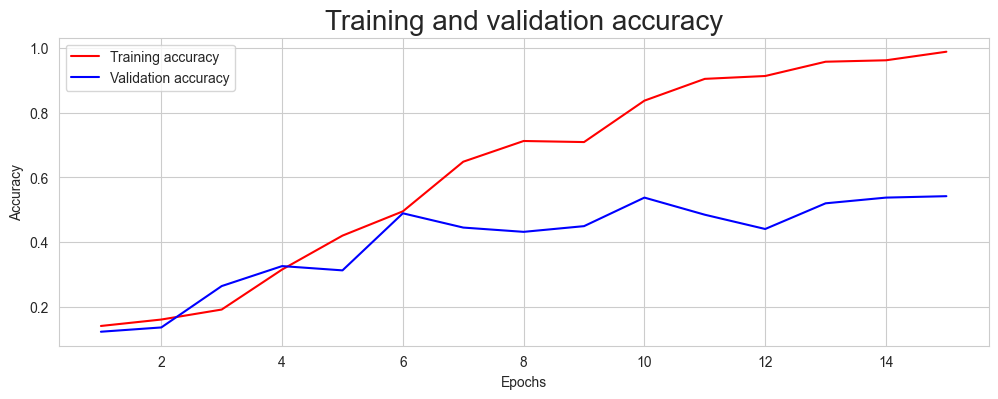

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The estimation of the classification accuracy, 5 cv approach, for this CNN is 0.5833 +/- 0.04181
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
STATISTICAL COMPARISON OF THE RESULTS OF T1 AND T2
T1: FFNN - The estimation of the classification accuracy, 5 cv approach, was 0.2679 +/- 0.04271
T2: CNN - The estimation of the classification accuracy, 5 cv approach, for the T2 CNN is 0.5833 +/- 0.04181
Since these 2 Confidence Intervals do not overlap we can conclude (with a 95% confidence level) that T2 performs better that T1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


2023-05-25 21:10:01.199444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Final Model: CNN - Conv 16 relu (MaxPooling2D) - Conv 32 relu (MaxPooling2D) - Conv 64 relu (MaxPooling2D) - Dense 128 relu - Dense 64 relu - 15 number of epochs
(With data augmentation) Test loss: 0.9543 - Test accuracy: 0.6564
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score increased by 10.6996% with data augmentation
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [3]:
################### Task 2 ###################

# THIS CODE WAS IMPLEMENTED WITH THE FOLLOWING VERSIONS OF Keras,Tensorflow and Scikit-learn:

# Keras: Version: 2.12.0

# Tensorflow: Version: 2.12.0

# Scikit-learn: Version: 1.2.2

from src.utils import *

# loading process of the dataset. This dataset was downloaded from 'https://drive.switch.ch/index.php/s/XSnhQDNar7y46oQ'. 
imgs, labels = load_imgs('./src/Wild_Cats_Dataset', ['CHEETAH' ,
                                                      'OCELOT',
                                                      'SNOW LEOPARD',
                                                      'CARACAL',
                                                      'LIONS',
                                                      'PUMA',
                                                      'TIGER'])

x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
print("-" * 170)

#####################################################################################################################################

# normalizing x
x = x/255

# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# setting the seed for reproducibility
import keras
import numpy as np
np.random.seed(80)
keras.utils.set_random_seed(80)

# importing warnings
import warnings
warnings.filterwarnings("ignore")

# importing needed libraries
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.initializers import HeNormal
from scipy import stats
import numpy as np
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator

# defing the architecture of the CNN - Conv - MaxPooling2D - Conv - MaxPooling2D - Conv - MaxPooling2D - Dense - Dense 
n_filter_first_conv = 16
n_filter_second_conv = 32
n_filter_third_conv = 64
neurons_first_layer = 128
neurons_second_layer = 64

# creating a Sequential model
cnn = Sequential()
# adding the first Convolutional layer
cnn.add(Conv2D(n_filter_first_conv, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal(), input_shape=(224, 224, 3)))
# adding the first Pooling layer
cnn.add(MaxPooling2D((2, 2)))
# adding the second Convolutional layer
cnn.add(Conv2D(n_filter_second_conv, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal()))
# adding the second Pooling layer
cnn.add(MaxPooling2D((2, 2)))
# adding the third Convolutional layer
cnn.add(Conv2D(n_filter_third_conv, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal()))
# adding the third Pooling layer
cnn.add(MaxPooling2D((2, 2)))
# flattening the tensor output from the last convolutional layer
cnn.add(Flatten())
# adding the first Dense layer
cnn.add(Dense(neurons_first_layer, activation='relu', kernel_initializer=HeNormal()))
# adding the second Dense layer
cnn.add(Dense(neurons_second_layer, activation='relu', kernel_initializer=HeNormal()))
# how many classes? 
n_classes = 7
# Adding the output layer
cnn.add(Dense(n_classes, activation='softmax'))

# compiling the model with the adam optimizer
cnn.compile(loss='categorical_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy'])

# setting the validation set size
validation_size = 0.20  # 20% of the training data

# number of epochs
epochs= 15

# training process with the validation_split and the history
history = cnn.fit(X_train, y_train, 
                  epochs=epochs,
                  batch_size=128,
                  validation_split = validation_size,
                  verbose = 0)

# saving the model
save_keras_model(cnn,'T2_cnn.h5')

# loading back the T2_cnn model
cnn = load_model('T2_cnn.h5')

print(f"Final Model: CNN - Conv {n_filter_first_conv} relu (MaxPooling2D) - Conv {n_filter_second_conv} relu (MaxPooling2D) - Conv {n_filter_third_conv} relu (MaxPooling2D) - Dense {neurons_first_layer} relu - Dense {neurons_second_layer} relu - {epochs} number of epochs")

# evaluating the model
scores = cnn.evaluate(X_test,y_test,verbose=0)

print("(No data augmentation) - Test loss: {:.4} - Test accuracy: {:.4}".format(*scores))
print("-" * 170)

# retrieving a list of accuracy results on training and validation data for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# number of epochs - for plotting
epochs_range = range(1,epochs+1)

# setting the style for the plot
sn.set_style("whitegrid")

# plotting training and validation accuracy per epoch
plt.figure(figsize=(12,4))
plt.plot(epochs_range, acc, 'r', label='Training accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy',size=20)
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
print("-" * 170)

# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Kfold approach to calculate an estimation of the classification accuracy we expect on new and unseen images

def create_model():
      # creating a Sequential model
      model = Sequential()
      # adding the first Convolutional layer
      model.add(Conv2D(n_filter_first_conv, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal(), input_shape=(224, 224, 3)))
      # adding the first Pooling layer
      model.add(MaxPooling2D((2, 2)))
      # adding the second Convolutional layer
      model.add(Conv2D(n_filter_second_conv, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal()))
      # adding the second Pooling layer
      model.add(MaxPooling2D((2, 2)))
      # adding the third Convolutional layer
      model.add(Conv2D(n_filter_third_conv, (3, 3), activation='relu', padding='same', kernel_initializer=HeNormal()))
      # adding the third Pooling layer
      model.add(MaxPooling2D((2, 2)))
      # flattening the tensor output from the last convolutional layer
      model.add(Flatten())
      # adding the first Dense layer
      model.add(Dense(neurons_first_layer, activation='relu', kernel_initializer=HeNormal()))
      # adding the second Dense layer
      model.add(Dense(neurons_second_layer, activation='relu', kernel_initializer=HeNormal()))
      # how many classes? 
      n_classes = 7
      # Adding the output layer
      model.add(Dense(n_classes, activation='softmax'))

      # compiling the model with the adam optimizer
      model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
      return model

# wrapping the model using the function you created
cnn_conf = KerasClassifier(build_fn=create_model, epochs = epochs, batch_size=128, verbose=0)

# setting the number of splits
n_splits = 5

# defining the cross validation method
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=80)

# performing cross-validation
results = cross_val_score(cnn_conf, x, y, cv=kfold)

# confidence level
confidence = 0.95
lower, upper = stats.t.interval(confidence, len(results)-1, loc=np.mean(results), scale=stats.sem(results))

print(f"The estimation of the classification accuracy, {n_splits} cv approach, for this CNN is {np.mean((lower, upper)):.4} +/- {(upper-lower)/2:.4}")

print("-" * 170)

# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# STATISTICAL COMPARISON OF THE RESULTS OF T1 AND T2

print("STATISTICAL COMPARISON OF THE RESULTS OF T1 AND T2")
# T1:
print("T1: FFNN - The estimation of the classification accuracy, 5 cv approach, was 0.2679 +/- 0.04271")
# T2: 
print(f"T2: CNN - The estimation of the classification accuracy, {n_splits} cv approach, for the T2 CNN is {np.mean((lower, upper)):.4} +/- {(upper-lower)/2:.4}")
# Result:
print("Since these 2 Confidence Intervals do not overlap we can conclude (with a 95% confidence level) that T2 performs better that T1")
print("-" * 170)

# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# IMAGE MANIPULATION/AUGMENTATION TECHNIQUE 

# creating an instance of ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=30, 
      zoom_range=0.3, 
      width_shift_range=0.20,
      height_shift_range=0.20, 
      horizontal_flip=True, 
      vertical_flip=False)

# fitting the datagen on X_train
datagen.fit(X_train)

# creating a new model similar to the previous CNN one
cnn_augmented = cnn 

# fitting the model using the augmented data
history_augmented = cnn_augmented.fit(datagen.flow(X_train, y_train, batch_size=128),
                                          steps_per_epoch=len(X_train) / 128,
                                          epochs=epochs, verbose=0)

# evaluating the model
scores_augmented = cnn_augmented.evaluate(X_test, y_test,verbose=0)

print(f"Final Model: CNN - Conv {n_filter_first_conv} relu (MaxPooling2D) - Conv {n_filter_second_conv} relu (MaxPooling2D) - Conv {n_filter_third_conv} relu (MaxPooling2D) - Dense {neurons_first_layer} relu - Dense {neurons_second_layer} relu - {epochs} number of epochs")
print("(With data augmentation) Test loss: {:.4} - Test accuracy: {:.4}".format(*scores_augmented))
print("-" * 170)
print(f"Accuracy score increased by {round((scores_augmented[1] - scores[1])*100,4)}% with data augmentation")
print("-" * 170)

In [2]:
################### Task 2 Bonus ###################

# THIS CODE WAS IMPLEMENTED WITH THE FOLLOWING VERSIONS OF Keras,Tensorflow and Scikit-learn:

# Keras: Version: 2.12.0

# Tensorflow: Version: 2.12.0

# Scikit-learn: Version: 1.2.2

from src.utils import *

# loading process of the dataset. This dataset was downloaded from 'https://drive.switch.ch/index.php/s/XSnhQDNar7y46oQ'. 
imgs, labels = load_imgs('./src/Wild_Cats_Dataset', ['CHEETAH' ,
                                                      'OCELOT',
                                                      'SNOW LEOPARD',
                                                      'CARACAL',
                                                      'LIONS',
                                                      'PUMA',
                                                      'TIGER'])

x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
print("-" * 170)

#####################################################################################################################################

# normalizing x
x = x/255

# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# setting the seed for reproducibility
import keras
import numpy as np
np.random.seed(80)
keras.utils.set_random_seed(80)

# importing warnings
import warnings 
warnings.filterwarnings("ignore")

   
# importing all the needed packages

from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from scipy import stats
import numpy as np

# setting the number of neurons per each layer
n_filter_first_conv = 16
n_filter_second_conv = 32
n_filter_third_conv = 64
neurons_first_layer = 128
neurons_second_layer = 64

# defining the function create_model with default parameters for kernel_initializer, pool_type and padding. The architecture is the same as the T2 CNN
def create_model(kernel_initializer='he_normal', padding='same'):
    # sequential model is a linear stack of layers. It's initialized here.
    cnn = Sequential()
    # adding a 2D convolution layer with 32 filters, a 3x3 kernel, 'relu' activation function, 
    # with the specified padding type and kernel initializer. The input shape is also specified for the first layer.
    cnn.add(Conv2D(n_filter_first_conv, (3, 3), activation='relu', padding=padding, kernel_initializer=kernel_initializer, input_shape=(224, 224, 3)))
    # adding the previously chosen type of pooling layer with 2x2 pool size.
    cnn.add(MaxPooling2D((2, 2)))
    # adding another 2D convolution layer with 64 filters.
    cnn.add(Conv2D(n_filter_second_conv, (3, 3), activation='relu', padding=padding, kernel_initializer=kernel_initializer))
    # adding another pooling layer.
    cnn.add(MaxPooling2D((2, 2)))
    # adding a third 2D convolution layer with 128 filters.
    cnn.add(Conv2D(n_filter_third_conv, (3, 3), activation='relu', padding=padding, kernel_initializer=kernel_initializer))
    # adding another pooling layer.
    cnn.add(MaxPooling2D((2, 2)))
    # Fflattening the tensor output from the last convolutional layer.
    cnn.add(Flatten())
    # adding a dense (fully connected) layer with 256 units and 'relu' activation function.
    cnn.add(Dense(neurons_first_layer, activation='relu', kernel_initializer=kernel_initializer))
    # adding another dense layer with 128 units.
    cnn.add(Dense(neurons_second_layer, activation='relu', kernel_initializer=kernel_initializer))
    # how many classes? 
    n_classes = 7
    # Adding the output layer
    cnn.add(Dense(n_classes, activation='softmax'))

    # compiling the model with categorical crossentropy loss function, Adam optimizer, and accuracy as the metric.
    cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Return the compiled model
    return cnn

# number of epochs
epochs = 15 

# creating a KerasClassifier object. 
model = KerasClassifier(build_fn=create_model, epochs=epochs, verbose=0)

# defining the grid search parameters: batch_size, kernel_initializer and padding
param_grid = {'batch_size': [32,128],
            'padding': ['same', 'valid']}

# creating the Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=0)

# fitting the GridSearchCV
grid_result = grid.fit(X_train, y_train)

# getting the best model: best_estimator_.model
cnn_best = grid.best_estimator_.model

# saving the best model
save_keras_model(cnn_best,'T2_cnn_bonus.h5')

# loading back the T2_cnn_bonus model
cnn_best = load_model('T2_cnn_bonus.h5')

# evaluating the best_estimator_.model
scores_best = cnn_best.evaluate(X_test, y_test,verbose=0)

# retrieving the best parameters fo the model
best_params = grid.best_params_

print(f"Final Model: CNN - Conv {n_filter_first_conv} relu (MaxPooling2D) - Conv {n_filter_second_conv} relu (MaxPooling2D) - Conv {n_filter_third_conv} relu (MaxPooling2D) - Dense {neurons_first_layer} relu - Dense {neurons_second_layer} relu - {epochs} number of epochs")
print("Best parameters found: ", grid.best_params_)
print("Test loss: {:.4} - Test accuracy: {:.4}".format(*scores_best))

# loading back the T2_cnn - for comparison
cnn = load_model('T2_cnn.h5') 

# evaluating the T2 cnn model
scores = cnn.evaluate(X_test, y_test,verbose=0)

print("-" * 160)
print(f"From the initial CNN to the tuned one: accuracy score increased on the same test set by {round((scores_best[1] - scores[1])*100,4)}% with grid search cv")
print("-" * 160)

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Kfold approach to calculate an estimation of the classification accuracy we expect on new and unseen images

# wrapping the model using the create_model with the best parameters found: padding & batch_size
cnn_bonus_conf = KerasClassifier(build_fn=lambda: create_model(padding=grid.best_params_['padding']), 
                            epochs = epochs, batch_size=grid.best_params_["batch_size"], verbose=0)

# setting the number of splits
n_splits = 5

# defining the cross validation method
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=80)

# performing cross-validation
results = cross_val_score(cnn_bonus_conf, x, y, cv=kfold)

#confidence level
confidence = 0.95
lower, upper = stats.t.interval(confidence, len(results)-1, loc=np.mean(results), scale=stats.sem(results))

print(f"The estimation of the classification accuracy, {n_splits} cv approach, for the (tuned) CNN is {np.mean((lower, upper)):.4} +/- {(upper-lower)/2:.4}")
print("-" * 160)

Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Final Model: CNN - Conv 16 relu (MaxPooling2D) - Conv 32 relu (MaxPooling2D) - Conv 64 relu (MaxPooling2D) - Dense 128 relu - Dense 64 relu - 15 number of epochs
Best parameters found:  {'batch_size': 32, 'padding': 'valid'}
Test loss: 1.727 - Test accuracy: 0.6337
----------------------------------------------------------------------------------------------------------------------------------------------------------------
From the initial CNN to the tuned one: accuracy score increased on the same test set by 8.4362% with grid search cv
----------------------------------------------------------------------------------------------------------------------------------------------------------------
The estimation of the classification accuracy, 5 cv